In [1]:
import pandas as pd

In [2]:
from Scripts import project_functions # This is called a relative import
df = project_functions.load_and_process("../data/raw/spi_matches.csv")
df

,season,date,league_id,league,team1,team2,spi_homeTeam,spi_awayTeam,prob1,prob2,probtie,score_homeTeam,score_awayTeam
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,0.2844,2.0,0.0
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,0.2819,2.0,0.0
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,0.2714,1.0,1.0
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,0.3013,0.0,0.0
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,0.2719,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,2018,2019-06-13,1871,Spanish Segunda Division,Mallorca,Albacete,37.68,34.35,0.4861,0.2099,0.3040,2.0,0.0
21604,2018,2019-06-15,1871,Spanish Segunda Division,Málaga,Deportivo La Coruña,36.60,39.91,0.4131,0.2548,0.3321,0.0,1.0
21605,2018,2019-06-16,1871,Spanish Segunda Division,Albacete,Mallorca,32.57,39.48,0.3764,0.3034,0.3202,1.0,0.0
21606,2018,2019-06-20,1871,Spanish Segunda Division,Deportivo La Coruña,Mallorca,41.55,38.31,0.4803,0.1988,0.3210,2.0,0.0


In [3]:
## Start of EDA

In [4]:
df.head()

,season,date,league_id,league,team1,team2,spi_homeTeam,spi_awayTeam,prob1,prob2,probtie,score_homeTeam,score_awayTeam
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,0.2844,2.0,0.0
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,0.2819,2.0,0.0
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,0.2714,1.0,1.0
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,0.3013,0.0,0.0
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,0.2719,1.0,2.0


In [5]:
df.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2',
       'spi_homeTeam', 'spi_awayTeam', 'prob1', 'prob2', 'probtie',
       'score_homeTeam', 'score_awayTeam'],
      dtype='object')

In [6]:
df.shape

(21608, 13)

In [7]:
df.nunique(axis = 0)

season               3
date               913
league_id           38
league              38
team1              708
team2              708
spi_homeTeam      7170
spi_awayTeam      7197
prob1             6600
prob2             5919
probtie           2606
score_homeTeam      11
score_awayTeam       9
dtype: int64

In [8]:
df.describe()

,season,league_id,spi_homeTeam,spi_awayTeam,prob1,prob2,probtie,score_homeTeam,score_awayTeam
count,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,2017.420354,2191.487829,46.692403,46.669301,0.451937,0.293348,0.254715,1.527953,1.166327
std,0.664714,918.069046,18.584678,18.592717,0.160741,0.144524,0.048828,1.280474,1.142793
min,2016.000000,1818.000000,4.470000,4.410000,0.027100,0.003200,0.000000,0.000000,0.000000
25%,2017.000000,1849.000000,33.310000,33.350000,0.351800,0.199400,0.236100,1.000000,0.000000
50%,2018.000000,1871.000000,44.460000,44.355000,0.443000,0.277800,0.262900,1.000000,1.000000
75%,2018.000000,2160.000000,59.472500,59.475000,0.540800,0.366425,0.284400,2.000000,2.000000
max,2018.000000,7921.000000,96.570000,96.780000,0.977500,0.899200,0.453700,10.000000,8.000000


In [18]:
df2 = df.groupby('season').mean()
df2

,league_id,spi_homeTeam,spi_awayTeam,prob1,prob2,probtie,score_homeTeam,score_awayTeam
season,,,,,,,,
2016,2024.795890,64.176231,64.214666,0.460156,0.290962,0.248881,1.613265,1.203176
2017,2221.964333,46.913200,46.885223,0.452434,0.289350,0.258216,1.517651,1.159287
2018,2200.902441,43.195173,43.163913,0.450004,0.296740,0.253256,1.519244,1.164469


In [19]:
#End of EDA

In [20]:
# Start of analysis

In [21]:
import seaborn as sns
import matplotlib as plt

In [12]:
#Research question: Does a higher SPI results to a win in a football match

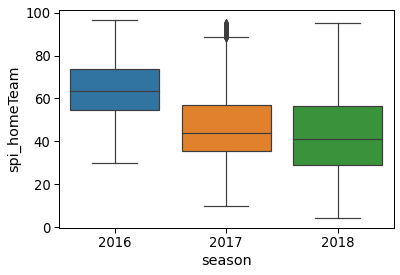

In [22]:
sns.boxplot(x= 'season', y = 'spi_homeTeam', data = df)
sns.set_context('paper', font_scale = 1.5)

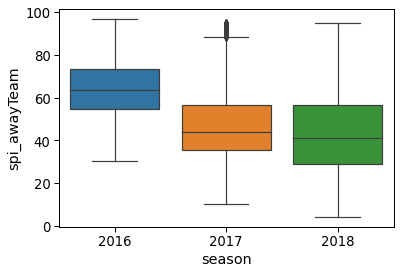

In [23]:
sns.boxplot(x= 'season', y = 'spi_awayTeam', data = df)
sns.set_context('paper', font_scale = 1.5)

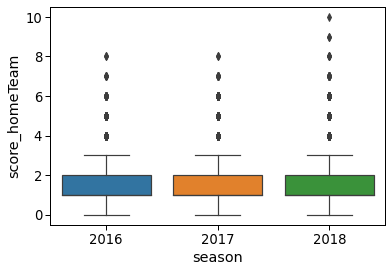

In [24]:
sns.boxplot(x= 'season', y = 'score_homeTeam', data = df)
sns.set_context('paper', font_scale = 1.5)

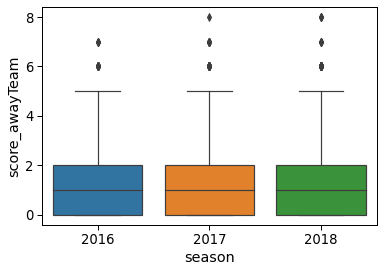

In [25]:
sns.boxplot(x= 'season', y = 'score_awayTeam', data = df)
sns.set_context('paper', font_scale = 1.5)

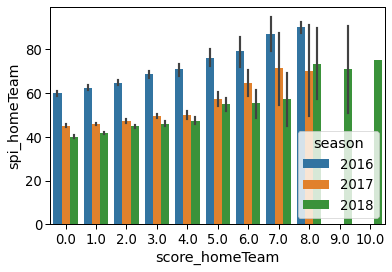

In [26]:
sns.barplot(x='score_homeTeam', y='spi_homeTeam', hue='season', data = df)
sns.set_context('paper', font_scale = 1.5)

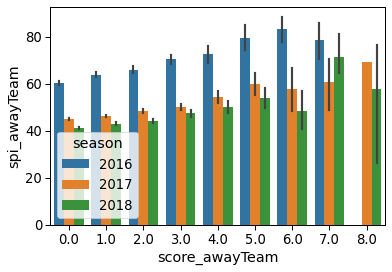

In [27]:
sns.barplot(x='score_awayTeam', y='spi_awayTeam', hue= "season", data = df)
sns.set_context('paper', font_scale = 1.5)

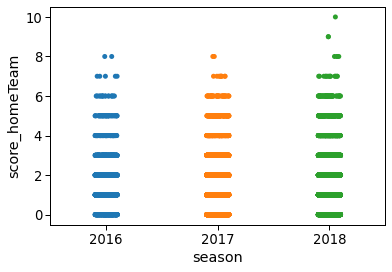

In [28]:
sns.stripplot(x='season',y='score_homeTeam', data = df, dodge = True, jitter = True)

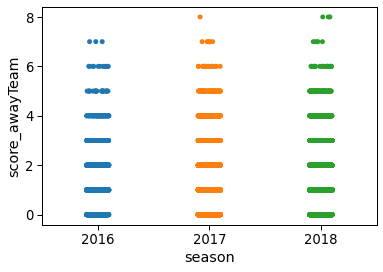

In [49]:
sns.stripplot(x='season',y='score_awayTeam', data = df, dodge = True, jitter = True)

In [29]:
df.to_csv('new_spi_matches2.csv', index = False)